In [1]:
#Question One
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

A = 250
h = 50
poro = 0.33
s_wi = 0.25
b_oi = 1.1


stoiip = 7758 * A * h * poro * (1 - s_wi) / b_oi
print(f"STOIIP = {stoiip} in stb")

STOIIP = 21819375.0 in stb


In [2]:
#Question Two
reservoirs = pd.DataFrame({'Thickness in ft':np.arange(1,12,1)})
reservoirs['STOIIP in stb'] = 7758 * A * h * poro * (1 - s_wi) / reservoirs['Thickness in ft'] 
print(reservoirs)

    Thickness in ft  STOIIP in stb
0                 1   2.400131e+07
1                 2   1.200066e+07
2                 3   8.000438e+06
3                 4   6.000328e+06
4                 5   4.800262e+06
5                 6   4.000219e+06
6                 7   3.428759e+06
7                 8   3.000164e+06
8                 9   2.666812e+06
9                10   2.400131e+06
10               11   2.181938e+06


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2531: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype, method=method)


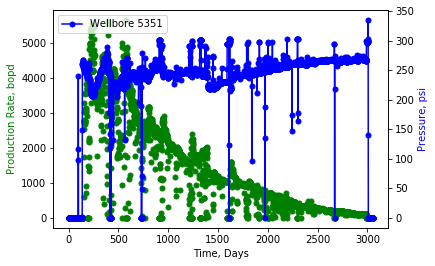

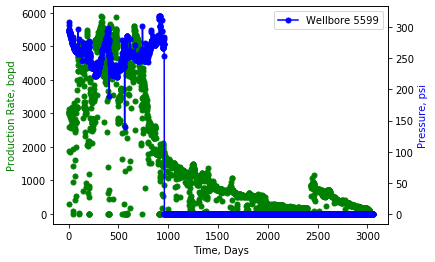

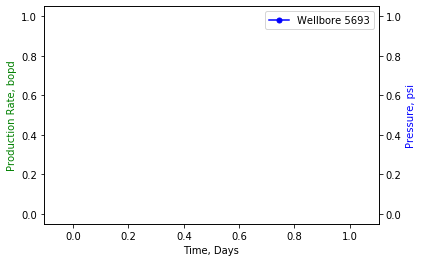

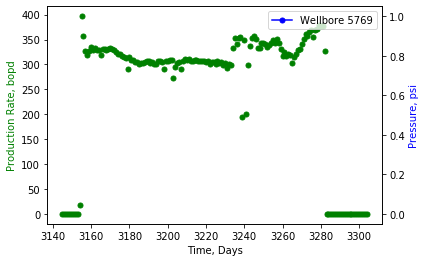

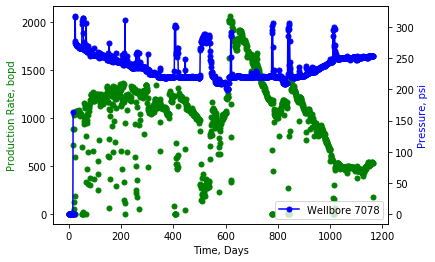

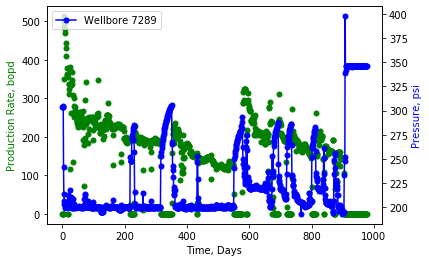

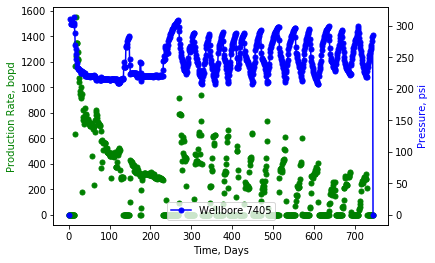

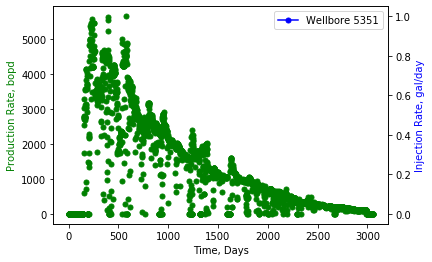

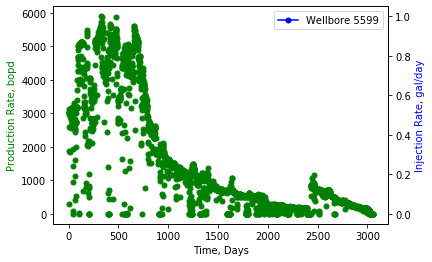

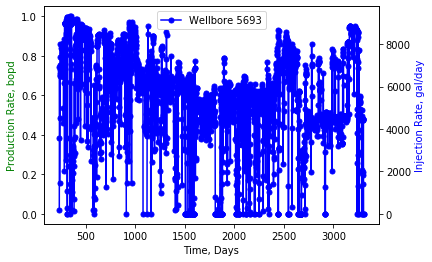

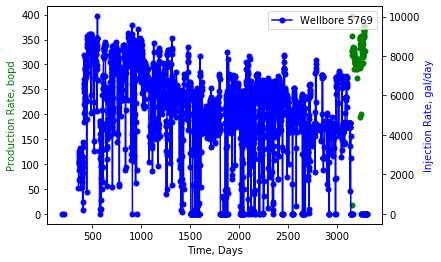

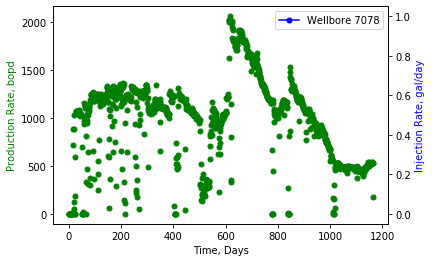

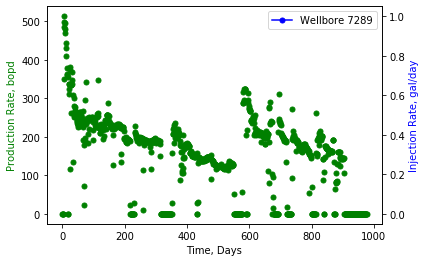

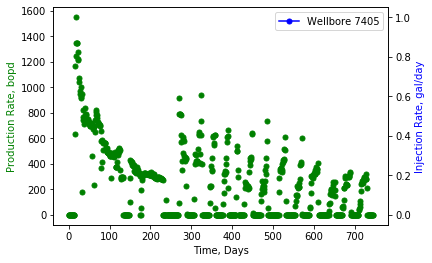

In [3]:
#Question Three
fileName = 'C:/Users/ksuden1/Desktop/pete2061-master/Volve production data.xlsx'
xl = pd.ExcelFile(fileName)
dailyDF = xl.parse('Daily Production Data')
monthlyDF = xl.parse('Monthly Production Data')



conn = sqlite3.connect("Volve.db")
cur = conn.cursor()

dailyDF.to_sql("DailyRates", conn, if_exists="append", index = False)
monthlyDF.to_sql("MonthlyRates", conn, if_exists="append", index = False)

wellbore = [5351,5599,5693,5769,7078,7289,7405]

for i in wellbore:
    
    testWellDF = pd.read_sql_query(f"SELECT AVG_DOWNHOLE_PRESSURE,BORE_OIL_VOL FROM DailyRates WHERE NPD_WELL_BORE_CODE={i};", conn) 
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot( testWellDF['BORE_OIL_VOL'], color="green", ls='None', marker='o', markersize=5,)
    ax2.plot( testWellDF['AVG_DOWNHOLE_PRESSURE'], color="blue", ls='solid', marker='o', markersize=5,label='Wellbore '+str(i))
    ax1.set_xlabel('Time, Days')
    ax1.set_ylabel('Production Rate, bopd', color='g')
    ax2.set_ylabel('Pressure, psi', color='b')
    plt.legend()
    
    plt.show()
    
for i in wellbore:
    
    testWellDF = pd.read_sql_query(f"SELECT BORE_WI_VOL,BORE_OIL_VOL FROM DailyRates WHERE NPD_WELL_BORE_CODE={i};", conn) 
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot( testWellDF['BORE_OIL_VOL'], color="green", ls='None', marker='o', markersize=5,)
    ax2.plot( testWellDF['BORE_WI_VOL'], color="blue", ls='solid', marker='o', markersize=5,label='Wellbore '+str(i))
    ax1.set_xlabel('Time, Days')
    ax1.set_ylabel('Production Rate, bopd', color='g')
    ax2.set_ylabel('Injection Rate, gal/day', color='b')
    plt.legend()
    
    plt.show()